<center>
<img src="../img/ml_theme.png">
# Майнор "Интеллектуальный анализ данных" 
# Курс "Анализ данных"
<img src="../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель ФКН НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="http://www.microsoft.com/en-us/openness/default.aspx#Ms-RL">Ms-RL</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.

# Семинар 2. Python для анализа данных. Pandas 
## Практическое задание. Анализ данных пассажиров "Титаника"

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
data = pd.read_csv('../data/titanic_train.csv')

### Данные представлены в виде таблицы
просмотрим первые 10 строк

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


### возьмем колонку Parch - кол-во родителей и детей пассажира на борту (из неё -- первые 10 элементов)

In [4]:
data['Parch'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    2
9    0
Name: Parch, dtype: int64

### возьмем только тех пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. (fare > 200)

Убедитесь, что Вы понимаете, как эта конструкция работает. <br />
Если нет - посмотрите, как вычисляется выражение в квадратных в скобках.

In [5]:
data[(data['Embarked'] == 'C') & (data['Fare'] > 200)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42,0,0,PC 17757,227.5250,NaN,C
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,227.5250,C62 C64,C
716,717,1,1,"Endres, Miss. Caroline Louise",female,38,0,0,PC 17757,227.5250,C45,C


### 1. Сколько мужчин / женщин находилось на борту?

In [6]:
sum(data['Sex'] == 'male')

577

In [7]:
sum(data['Sex'] == 'female')

314

### 2. Выведите распределение по переменной Pclass (социально-экономический статус); 

### дополнительно -- это же распределение только для мужчин / женщин


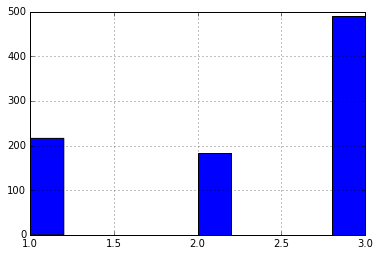

In [8]:
data['Pclass'].hist()

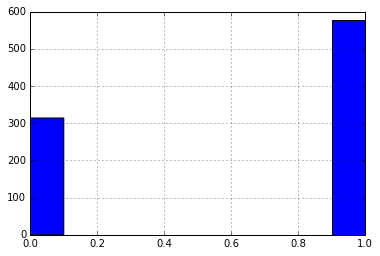

In [9]:
# data['Male'] = .astype('int64')
(data['Sex'] == 'male').hist()

### 3. Сколько в среднем заплатил один пассажир? Найдите дисперсию этой величины. Сколько все пассажиры заплатили в сумме?

In [10]:
import numpy as np
print("Mean fare: ", round(np.mean(data['Fare']), 3))
print("Median fare: ", round(np.median(data['Fare']), 3))
print("Std: ", round(np.std(data['Fare']), 3))

('Mean fare: ', 32.204)
('Median fare: ', 14.454)
('Std: ', 49.666)


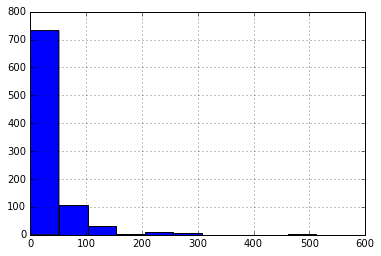

In [11]:
data['Fare'].hist()

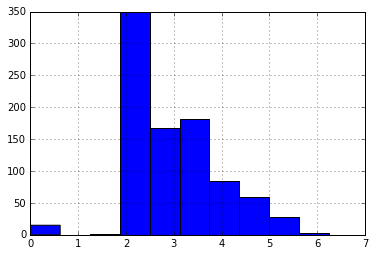

In [12]:
np.log(1 + data['Fare']).hist()

In [13]:
round(np.sum(data['Fare']), 3)

28693.949

### 4. Правда ли, что молодые выживали чаще (с большей вероятностью), чем старики?

In [14]:
print(float(len(data[(data['Age'] < 30) &
                     (data['Survived'] == 1)]))
      /len(data[data['Age'] < 30]))
print(float(len(data[(data['Age'] > 55) & 
                     (data['Survived'] == 1)]))
      /len(data[data['Age'] > 55]))

0.40625
0.3


### 5. Правда ли, что женщины выживали чаще мужчин?

In [15]:
print(len(data[(data['Sex'] == 'female') &
         (data['Survived'] == 1)]) > 
      len(data[(data['Sex'] == 'male') 
               & (data['Survived'] == 1)]))

True


### 6. Какое самое популярное мужское имя? (среди тех, кто был на борту, конечно)

In [16]:
full_names = data[['Mr.' in name for name in data['Name']]]['Name']
names = [full_name.split(",")[1].split()[1] for full_name in full_names]
names[np.argmax(names)]

'Yousseff'

### 7. Сравните распределение стоимости билетов у спасенных и у погибших
Есть мысли, откуда появилось это различие?

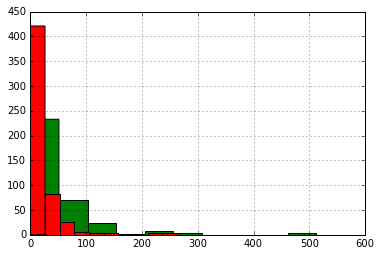

In [17]:
data[data['Survived'] == 1]['Fare'].hist(color="green")
data[data['Survived'] == 0]['Fare'].hist(color="red")

### 8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?

In [18]:
for cl in np.unique(data['Pclass']):
    for sex in np.unique(data['Sex']):
        print("Average age for {0} and class {1}: {2}".format(sex, cl, 
            np.mean(data[(data['Sex'] == sex)
                         & (data['Pclass'] == cl)]['Age'])))

Average age for female and class 1: 34.6117647059
Average age for male and class 1: 41.2813861386
Average age for female and class 2: 28.722972973
Average age for male and class 2: 30.7407070707
Average age for female and class 3: 21.75
Average age for male and class 3: 26.5075889328
